<a href="https://colab.research.google.com/github/RamadhanAlraziynK3/RamadhanAlraziynK3/blob/main/Yet_another_copy_of_REVENUE_PREDICTION_12_MONTHS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score

1.READ AND REPROCESS DATA

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving revenue_data.csv to revenue_data (1).csv


In [ ]:
data = pd.read_csv("revenue_data.csv")
data.head()

,id,revenue_juta,date
0,1,112,1949-01-01
1,2,118,1949-02-01
2,3,132,1949-03-01
3,4,129,1949-04-01
4,5,121,1949-05-01


In [ ]:
data.describe()

,id,revenue_juta
count,144.000000,144.000000
mean,72.500000,280.298611
std,41.713307,119.966317
min,1.000000,104.000000
25%,36.750000,180.000000
50%,72.500000,265.500000
75%,108.250000,360.500000
max,144.000000,622.000000


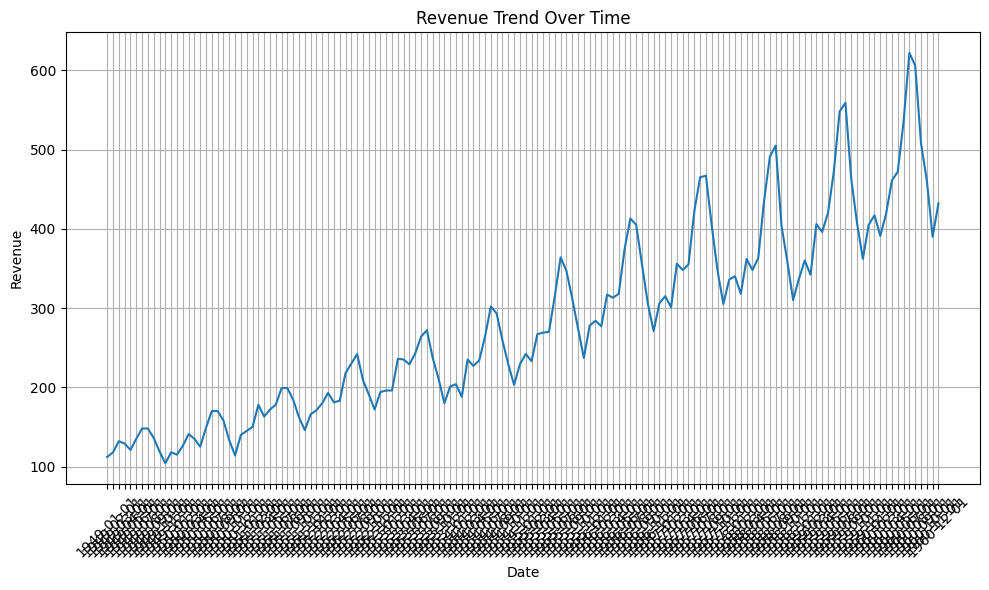

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['revenue_juta'])
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue Trend Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


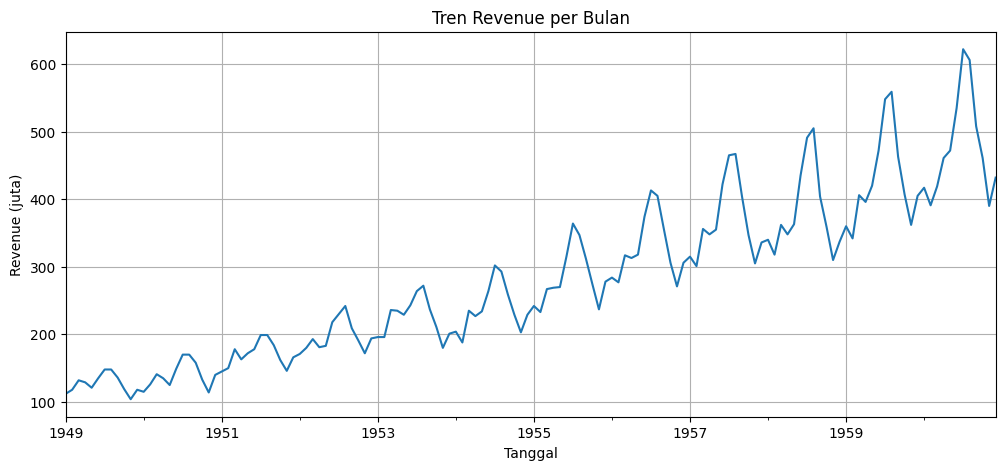

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd # Import pandas as it is needed here

# Pastikan kolom tanggal dalam datetime
# Change revenue_df to data since data is the DataFrame loaded from the CSV
data['date'] = pd.to_datetime(data['date'])

# Set index ke tanggal
# Change revenue_df to data
data.set_index('date', inplace=True)

# Plot tren revenue
# Change revenue_df to data
data['revenue_juta'].plot(figsize=(12, 5), title='Tren Revenue per Bulan')
plt.xlabel("Tanggal")
plt.ylabel("Revenue (juta)")
plt.grid(True)
plt.show()

2.SPLIT THE DATA

In [ ]:
# Define features (X) and target (y)

# Calculate days since the start date
# The index is already the date, so we can use the first date in the index
data['days_since_start'] = (data.index - data.index.min()).days

# Define features (X) and target (y)
X = data[['days_since_start']]
y = data['revenue_juta']

3.TRAIN THE MODEL

In [ ]:
# Get the coefficients
# You need to create and train the model first
from sklearn.linear_model import LinearRegression # Ensure LinearRegression is imported

model = LinearRegression() # Instantiate the model
model.fit(X, y) # Train the model using your features X and target y

beta0 = model.intercept_
beta1 = model.coef_[0]

In [ ]:

# Print the formula
print(f"revenue = {beta0:.4f} + {beta1:.4f}*date")

revenue = 90.4185 + 0.0873*date


In [ ]:
# Define features (X) and target (y)

# Calculate days since the start date
# The index is already the date, so we can use the first date in the index
data['days_since_start'] = (data.index - data.index.min()).days

# Define features (X) and target (y)
X = data[['days_since_start']]
y = data['revenue_juta']

# Import train_test_split here to ensure it's available
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# We will use 80% of the data for training and 20% for testing
# random_state is set for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Get the coefficients
beta0 = model.intercept_
beta1 = model.coef_[0]

In [ ]:

# Print the formula
print(f"revenue = {beta0:.4f} + {beta1:.4f}*date")

revenue = 86.9213 + 0.0897*date


4.PREDICTION AND VISUALIZATION

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


RMSE: 39.63
R² Score: 0.842


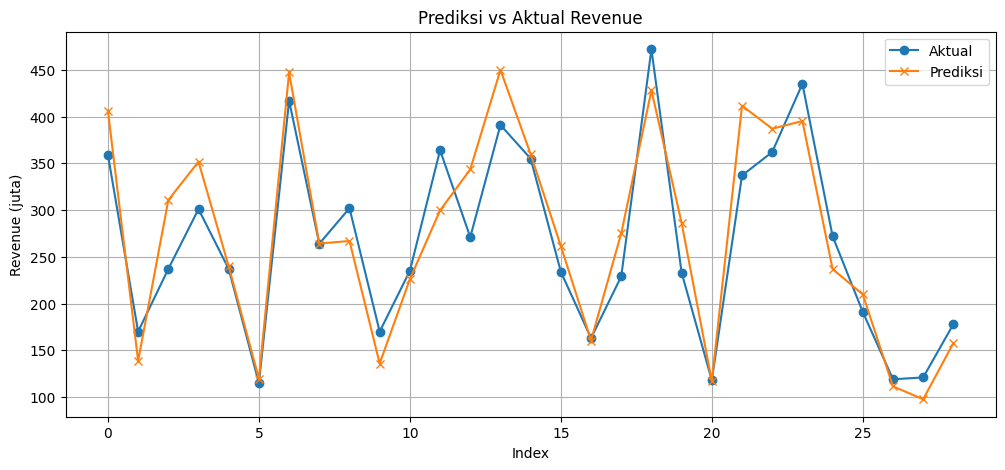

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label='Aktual', marker='o')
plt.plot(y_pred, label='Prediksi', marker='x')
plt.title('Prediksi vs Aktual Revenue')
plt.xlabel('Index')
plt.ylabel('Revenue (juta)')
plt.legend()
plt.grid(True)
plt.show()


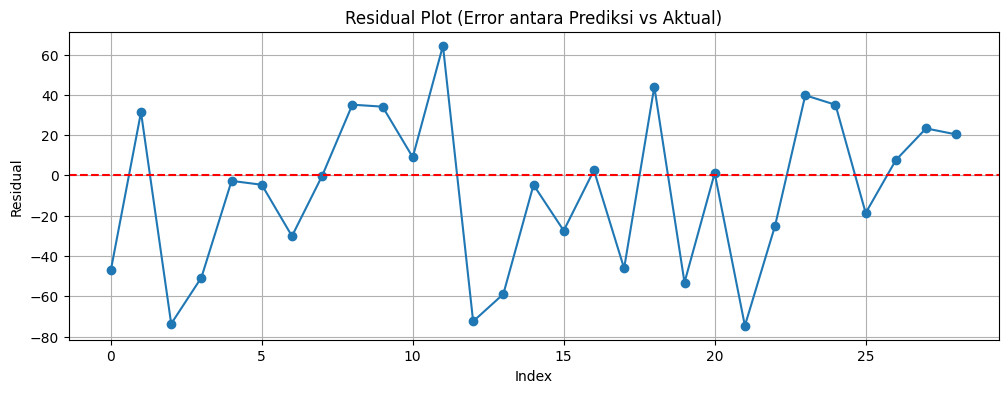

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(12, 4))
plt.plot(residuals.values, marker='o')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot (Error antara Prediksi vs Aktual)')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-38-c25e1093d24b>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index.max(), periods=12, freq='M'), future_preds, label='Prediksi Masa Depan', linestyle='--') # Use data.index.max()


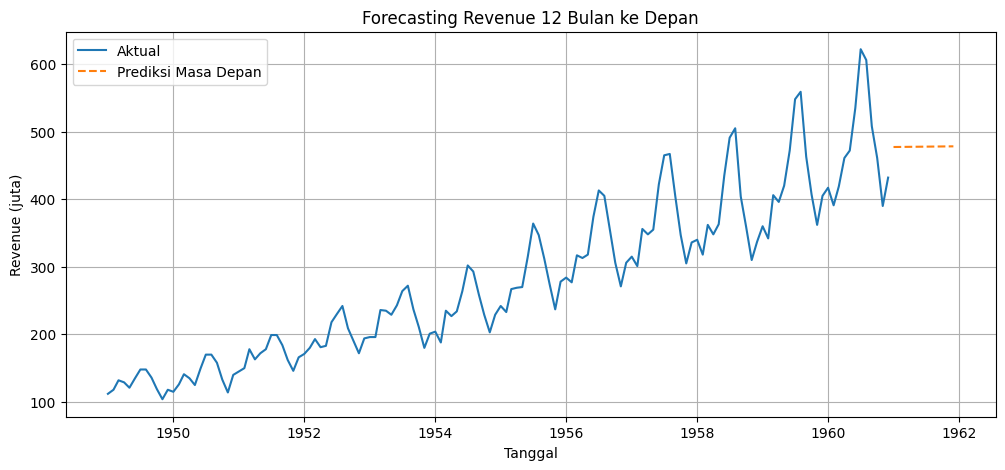

In [ ]:
# Prediksi 12 bulan ke depan
future_days = np.arange(X['days_since_start'].max() + 1, X['days_since_start'].max() + 13).reshape(-1, 1)
future_preds = model.predict(future_days)

# Visualisasi prediksi masa depan
plt.figure(figsize=(12, 5))
# Change df to data
plt.plot(data.index, y, label='Aktual') # Use data.index for the dates
plt.plot(pd.date_range(data.index.max(), periods=12, freq='M'), future_preds, label='Prediksi Masa Depan', linestyle='--') # Use data.index.max()
plt.title('Forecasting Revenue 12 Bulan ke Depan')
plt.xlabel('Tanggal')
plt.ylabel('Revenue (juta)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Install Plotly (jika belum tersedia)
!pip install plotly

# Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.express as px

# Load dataset
df = pd.read_csv("revenue_data.csv")  # pastikan nama sesuai
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df['days_since_start'] = (df['date'] - df['date'].min()).dt.days

# Definisikan fitur dan target
X = df[['days_since_start']]
y = df['revenue_juta']

# Train model Linear Regression
model = LinearRegression()
model.fit(X, y)

# Prediksi 12 bulan ke depan
future_days = np.arange(X['days_since_start'].max() + 1, X['days_since_start'].max() + 13).reshape(-1, 1)
future_preds = model.predict(future_days)

# Siapkan data pie chart
future_dates = pd.date_range(df['date'].max() + pd.Timedelta(days=1), periods=12, freq='M')
pie_df = pd.DataFrame({
    'Bulan': future_dates.strftime('%b %Y'),
    'Revenue_Prediksi': future_preds
})

# Buat pie chart
fig = px.pie(pie_df,
             names='Bulan',
             values='Revenue_Prediksi',
             title='Distribusi Prediksi Revenue (12 Bulan ke Depan)',
             color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker=dict(line=dict(color='white', width=2)))
fig.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-39-53e823969c09>:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(df['date'].max() + pd.Timedelta(days=1), periods=12, freq='M')


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

<ipython-input-42-daaf3c2c5523>:10: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



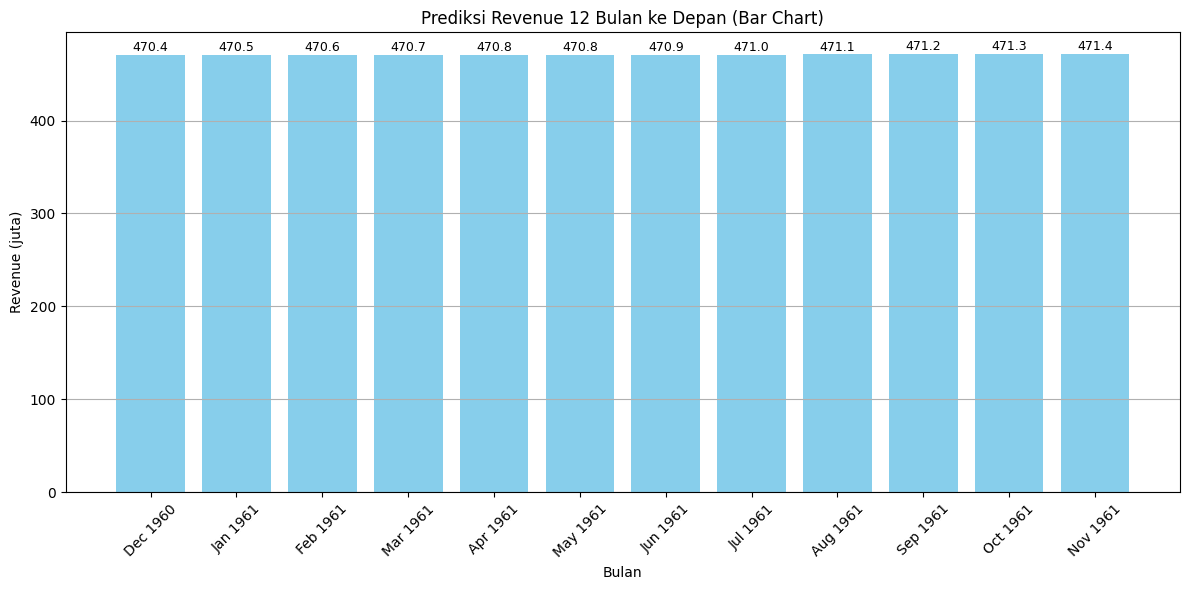

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Prediksi 12 bulan ke depan
future_days = np.arange(X['days_since_start'].max() + 1, X['days_since_start'].max() + 13).reshape(-1, 1)
future_preds = model.predict(future_days)

# Buat label bulan untuk x-axis
future_dates = pd.date_range(df['date'].max() + pd.Timedelta(days=1), periods=12, freq='M')
bulan_labels = future_dates.strftime('%b %Y')

# Bar chart visualisasi
plt.figure(figsize=(12, 6))
bars = plt.bar(bulan_labels, future_preds, color='skyblue')
plt.title('Prediksi Revenue 12 Bulan ke Depan (Bar Chart)')
plt.xlabel('Bulan')
plt.ylabel('Revenue (juta)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Tambahkan label angka di atas batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}', ha='center', va='bottom', fontsize=9, color='black')

plt.show()


In [ ]:
# Temukan nilai maksimum dan minimum
max_idx = np.argmax(future_preds)
min_idx = np.argmin(future_preds)

max_bulan = bulan_labels[max_idx]
min_bulan = bulan_labels[min_idx]

max_val = future_preds[max_idx]
min_val = future_preds[min_idx]

print(f"📈 Prediksi revenue tertinggi: {max_val:.2f} juta pada {max_bulan}")
print(f"📉 Prediksi revenue terendah : {min_val:.2f} juta pada {min_bulan}")


📈 Prediksi revenue tertinggi: 471.36 juta pada Nov 1961
📉 Prediksi revenue terendah : 470.40 juta pada Dec 1960


HASIL VISUALISASI PPREDKSI REVENUE TERBESAR DAN TERKECIL DALAM KURUN 6 BULAN

WARNA MERAH: REVENUE DENGAN NOMINAL TERKECIL

WARNA HIJAU: REVENUE DENGAN NOMINAL TERBESAR

WARNA BIRU:  REVENUYE DENGAN NOMINAL SEDANG/ MERATA

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

<ipython-input-44-775c40be8280>:10: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



📈 Prediksi revenue tertinggi: 471.36 juta pada Nov 1961
📉 Prediksi revenue terendah : 470.40 juta pada Dec 1960


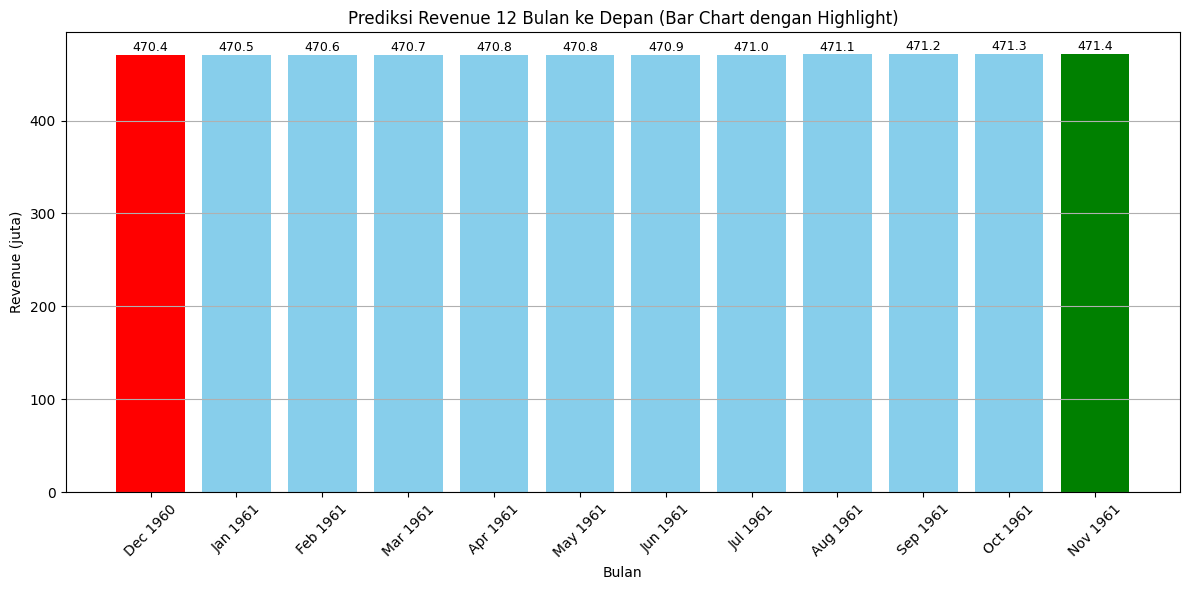

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Prediksi 12 bulan ke depan
future_days = np.arange(X['days_since_start'].max() + 1, X['days_since_start'].max() + 13).reshape(-1, 1)
future_preds = model.predict(future_days)

# Label bulan
future_dates = pd.date_range(df['date'].max() + pd.Timedelta(days=1), periods=12, freq='M')
bulan_labels = future_dates.strftime('%b %Y')

# Cari index nilai tertinggi dan terendah
max_idx = np.argmax(future_preds)
min_idx = np.argmin(future_preds)

# Warna batang: default biru, hijau untuk tertinggi, merah untuk terendah
colors = ['skyblue'] * len(future_preds)
colors[max_idx] = 'green'
colors[min_idx] = 'red'

# Plot bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(bulan_labels, future_preds, color=colors)
plt.title('Prediksi Revenue 12 Bulan ke Depan (Bar Chart dengan Highlight)')
plt.xlabel('Bulan')
plt.ylabel('Revenue (juta)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Tambahkan label angka di atas batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}', ha='center', va='bottom', fontsize=9, color='black')

# Tampilkan informasi maksimum dan minimum
max_bulan = bulan_labels[max_idx]
min_bulan = bulan_labels[min_idx]
max_val = future_preds[max_idx]
min_val = future_preds[min_idx]

print(f"📈 Prediksi revenue tertinggi: {max_val:.2f} juta pada {max_bulan}")
print(f"📉 Prediksi revenue terendah : {min_val:.2f} juta pada {min_bulan}")

plt.show()
